# This is the practice for logistic regression
## Goals:
### 1 - Fit logistic regression model (Sklearn and GLM- statsmodel)
### 2 - metrics to evaluate binary classification model

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression #, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score

import statsmodels.api as sm


from dmba import classificationSummary

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

no display found. Using non-interactive Agg backend


Define paths to data sets. 

In [2]:
# DATA = Path('.').resolve().parents[1] / 'Practice/logit'
# LOAN3000_CSV = DATA / 'loan3000.csv'
LOAN3000_CSV = 'loan3000.csv'
print(LOAN3000_CSV)

loan3000.csv


### Load Data and EDA

In [3]:
loan_data = pd.read_csv(LOAN3000_CSV)
print(loan_data.shape)
print(loan_data.columns)
loan_data.head()

(3000, 6)
Index(['Unnamed: 0', 'outcome', 'purpose_', 'dti', 'borrower_score',
       'payment_inc_ratio'],
      dtype='object')


,Unnamed: 0,outcome,purpose_,dti,borrower_score,payment_inc_ratio
0,32109,paid off,debt_consolidation,21.23,0.40,5.11135
1,16982,default,credit_card,15.49,0.40,5.43165
2,25335,paid off,debt_consolidation,27.30,0.70,9.23003
3,34580,paid off,major_purchase,21.11,0.40,2.33482
4,14424,default,debt_consolidation,16.46,0.45,12.10320


In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3000 non-null   int64  
 1   outcome            3000 non-null   object 
 2   purpose_           3000 non-null   object 
 3   dti                3000 non-null   float64
 4   borrower_score     3000 non-null   float64
 5   payment_inc_ratio  3000 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 140.8+ KB


##### Task: Create 'dv' before run the cell

In [4]:
loan_data = loan_data.drop(['Unnamed: 0'], axis=1).copy()
loan_data.columns=['outcome', 'purpose', 'dti', 'borrower_score', 'payment_inc_ratio']
loan_data['dv'] = [1 if out=="default" else 0 for out in loan_data['outcome']]

print(loan_data.shape)
print(loan_data.columns)
print(loan_data.head())

(3000, 6)
Index(['outcome', 'purpose', 'dti', 'borrower_score', 'payment_inc_ratio',
       'dv'],
      dtype='object')
    outcome             purpose    dti  borrower_score  payment_inc_ratio  dv
0  paid off  debt_consolidation  21.23            0.40            5.11135   0
1   default         credit_card  15.49            0.40            5.43165   1
2  paid off  debt_consolidation  27.30            0.70            9.23003   0
3  paid off      major_purchase  21.11            0.40            2.33482   0
4   default  debt_consolidation  16.46            0.45           12.10320   1


In [5]:
for nm in loan_data.columns:
    print("\n{}".format(nm))
    print(loan_data[nm].value_counts())


outcome
paid off    1555
default     1445
Name: outcome, dtype: int64

purpose
debt_consolidation    1738
credit_card            525
other                  318
home_improvement       186
major_purchase         115
small_business          88
medical                 30
Name: purpose, dtype: int64

dti
17.33    7
16.20    6
22.14    5
18.62    5
21.26    5
        ..
24.69    1
0.70     1
22.24    1
6.36     1
26.67    1
Name: dti, Length: 1870, dtype: int64

borrower_score
0.50    444
0.55    423
0.45    418
0.60    361
0.40    354
0.65    244
0.35    218
0.70    159
0.30    150
0.25     77
0.75     71
0.20     30
0.80     30
0.85     10
0.15      7
0.90      3
0.10      1
Name: borrower_score, dtype: int64

payment_inc_ratio
14.16070    2
9.82954     2
12.28830    2
7.82267     2
8.08560     2
           ..
8.26695     1
7.37860     1
3.83265     1
4.68200     1
12.88190    1
Name: payment_inc_ratio, Length: 2962, dtype: int64

dv
0    1555
1    1445
Name: dv, dtype: int64


##### Task - Please use 'dv' columnn calculate event rate, finish below cell before run

In [6]:
print("event rate is: {}".format(loan_data['dv'].mean()))
# print("event rate is: {}".format(sum(loan_data['dv'])*100/len(loan_data)))

event rate is: 0.4816666666666667


In [7]:
loan_data.isnull().sum()


outcome              0
purpose              0
dti                  0
borrower_score       0
payment_inc_ratio    0
dv                   0
dtype: int64

In [11]:
numcols=list(loan_data.describe().columns)
num_stats = loan_data.describe().transpose() 
num_stats["nuniqueWna"]= loan_data[numcols].nunique(dropna=False) 
num_stats["nunique"]= loan_data[numcols].nunique()
num_stats

,count,mean,std,min,25%,50%,75%,max,nuniqueWna,nunique
dti,3000.0,16.120103,7.590890,0.000000,10.362500,15.98500,21.3600,35.2700,1870,1870
borrower_score,3000.0,0.502333,0.128297,0.100000,0.400000,0.50000,0.6000,0.9000,17,17
payment_inc_ratio,3000.0,8.137902,4.296310,0.221906,4.758135,7.58842,11.0915,33.6309,2962,2962
dv,3000.0,0.481667,0.499747,0.000000,0.000000,0.00000,1.0000,1.0000,2,2


In [18]:
loan_data.groupby(["purpose", 'dv']).size().reset_index(name='counts')

,purpose,dv,counts
0,credit_card,0,318
1,credit_card,1,207
2,debt_consolidation,0,876
3,debt_consolidation,1,862
4,home_improvement,0,106
5,home_improvement,1,80
6,major_purchase,0,66
7,major_purchase,1,49
8,medical,0,11
9,medical,1,19


In [12]:
purpose_risk = pd.concat([loan_data.groupby(["purpose"]).size(), loan_data.groupby(["purpose"]).sum()['dv']], axis=1)
purpose_risk.columns = ['count','default']
purpose_risk['default_rate']=purpose_risk['default']/purpose_risk['count']
print(purpose_risk.sort_values(['default_rate']))

                    count  default  default_rate
purpose                                         
credit_card           525      207      0.394286
major_purchase        115       49      0.426087
home_improvement      186       80      0.430108
debt_consolidation   1738      862      0.495972
other                 318      172      0.540881
medical                30       19      0.633333
small_business         88       56      0.636364


Correlation Matrix 
                         dti  borrower_score  payment_inc_ratio        dv
dti                1.000000       -0.258860           0.232972  0.152942
borrower_score    -0.258860        1.000000          -0.109575 -0.297070
payment_inc_ratio  0.232972       -0.109575           1.000000  0.162454
dv                 0.152942       -0.297070           0.162454  1.000000


[Text(0.5, 0, 'dti'),
 Text(1.5, 0, 'borrower_score'),
 Text(2.5, 0, 'payment_inc_ratio'),
 Text(3.5, 0, 'dv')]

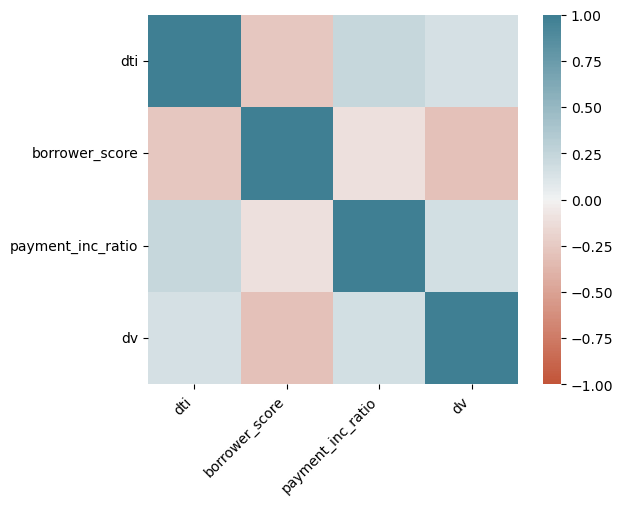

In [13]:
corr = loan_data[numcols].corr()
print("Correlation Matrix \n {}".format(corr))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
        horizontalalignment='right'
)

This dataset do not have too much variables, therefore just did a light EDA. You can plot bar, histogram and bar/target, hist/targert. For this data just need to convert nominal to numerical

# Logistic regression

## Logistic Regression and the GLM
The package _scikit-learn_ has a specialised class for `LogisticRegression`. _Statsmodels_ has a more general method based on generalized linear model (GLM).

In scikit-learn, your target variable could be numerical or categorical.

In [24]:
predictors = ['purpose', 'dti', 'borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

loan, loan_test = train_test_split(loan_data, test_size=0.2)

X_train = pd.get_dummies(loan[predictors], prefix='', prefix_sep='', drop_first=True)
y_train = loan[outcome] 

X_test = pd.get_dummies(loan_test[predictors], prefix='', prefix_sep='', drop_first=True)
y_test = loan_test[outcome] 

#C=1e42, regularization term, smaller = more regularization
logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
logit_reg.fit(X_train, y_train)

print('intercept ', logit_reg.intercept_[0])
print('classes', logit_reg.classes_)
pd.DataFrame({'coeff': logit_reg.coef_[0]}, 
             index=X_train.columns)


intercept  -1.1824762523120462
classes ['default' 'paid off']


,coeff
dti,-0.015878
borrower_score,5.018702
payment_inc_ratio,-0.079485
debt_consolidation,-0.346713
home_improvement,-0.620088
major_purchase,-0.522013
medical,-1.385622
other,-0.618386
small_business,-1.604064


##### Task - Please fit the model second model with taget is a binary target 'dv', finish below cell in "Fit model"
##### Task continued - please output final model result as example above
##### QUESTION - Are the fitted coefficents different between the two model? Why?

In [21]:
predictors = ['purpose', 'dti', 'borrower_score', 'payment_inc_ratio']
outcome = 'dv'

loan, loan_test = train_test_split(loan_data, test_size=0.2)

X_train = pd.get_dummies(loan[predictors], prefix='', prefix_sep='', drop_first=True)
y_train = loan[outcome] 

X_test = pd.get_dummies(loan_test[predictors], prefix='', prefix_sep='', drop_first=True)
y_test = loan_test[outcome] 

# Fit model 
logit_reg2 =LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
logit_reg2.fit(X_train, y_train)

print('intercept ', logit_reg2.intercept_[0])
print('classes', logit_reg2.classes_)
pd.DataFrame({'coeff': logit_reg2.coef_[0]}, 
             index=X_train.columns)
 # code up your solution here

intercept  0.9062823744888082
classes [0 1]


,coeff
dti,0.024528
borrower_score,-4.639198
payment_inc_ratio,0.065644
debt_consolidation,0.351953
home_improvement,0.469421
major_purchase,0.470317
medical,1.270168
other,0.696889
small_business,1.235440


The coefficients of the two models are near opposite in absolute value. The reason is because in first model, the outcome classes are ['default' 'paid off'], while in the second model, the outcome classes is [0 1]. 0 represents 'paid off' and 1 represents 'default', thus the outcome classes are arranged in opposite order. 

#### Predicted Values from Logistic Regression

In [23]:
pred_train = pd.DataFrame(logit_reg.predict_proba(X_train),
                    columns=logit_reg.classes_)
pred_test = pd.DataFrame(logit_reg.predict_proba(X_test),
                    columns=logit_reg.classes_)
print(pred_train.describe())

print(pred_test.describe())

           default     paid off
count  2400.000000  2400.000000
mean      0.483334     0.516666
std       0.170891     0.170891
min       0.085313     0.083325
25%       0.355634     0.392199
50%       0.478798     0.521202
75%       0.607801     0.644366
max       0.916675     0.914687
          default    paid off
count  600.000000  600.000000
mean     0.478873    0.521127
std      0.174738    0.174738
min      0.098476    0.084067
25%      0.341762    0.389070
50%      0.476741    0.523259
75%      0.610930    0.658238
max      0.915933    0.901524


In [ ]:
pred_train = pd.DataFrame(logit_reg2.predict_proba(X_train),
                    columns=logit_reg2.classes_)
pred_test = pd.DataFrame(logit_reg2.predict_proba(X_test),
                    columns=logit_reg2.classes_)
print(pred_train.describe())

print(pred_test.describe())

## GLM Model - logistic regression
For comparison, here the GLM model using _statsmodels_. This method requires that the outcome class is mapped to numbers. 

You can use GLM (general linear model) with the binomial family to fit a logistic regression

*Note: use this GLM module you can fit a series of model by changing the link function which specified in the family option*

In [26]:
predictors = ['purpose', 'dti', 'borrower_score', 'payment_inc_ratio']
outcome = 'dv'

loan, loan_test = train_test_split(loan_data, test_size=0.2)

X_train = pd.get_dummies(loan[predictors], prefix='', prefix_sep='', drop_first=True)
y_train = loan[outcome] 

X_test = pd.get_dummies(loan_test[predictors], prefix='', prefix_sep='', drop_first=True)
y_test = loan_test[outcome] 

logit_reg_sm = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
logit_result = logit_reg_sm.fit()
print(logit_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     dv   No. Observations:                 2400
Model:                            GLM   Df Residuals:                     2390
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1505.3
Date:                Wed, 08 Feb 2023   Deviance:                       3010.6
Time:                        19:09:08   Pearson chi2:                 2.38e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1224
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9436      0

# Evaluating Classification Models
## Confusion Matrix

###### Let's take a look how different prediction looks like

In [29]:
logit_reg.predict(X_test)[:10]

array(['default', 'default', 'default', 'default', 'paid off', 'paid off',
       'paid off', 'paid off', 'paid off', 'paid off'], dtype=object)

In [30]:
logit_reg.predict_proba(X_test)[:10]

array([[0.62969273, 0.37030727],
       [0.7262903 , 0.2737097 ],
       [0.65897382, 0.34102618],
       [0.56773069, 0.43226931],
       [0.18324272, 0.81675728],
       [0.39038996, 0.60961004],
       [0.28837207, 0.71162793],
       [0.31352779, 0.68647221],
       [0.40479363, 0.59520637],
       [0.37069883, 0.62930117]])

##### Manully create confusion matrix

In [27]:
# Confusion matrix
pred_y = logit_reg.predict(X_test)
pred_y = [1 if p == 'default' else 0 for p in pred_y]
true_y = y_test 
true_pred = pd.DataFrame({'True': true_y, 'Pred': pred_y})
true_pred['Cnt'] = [1] *len(true_y)
confM=true_pred.groupby(['True', 'Pred']).size()

print("\nConfusion Matrix in 1D array\n {}".format(confM))

print("\nConfusion Matrix in 2 by 2 Table Format\n {}".format(pd.pivot_table(true_pred, values='Cnt', index=['True'],
                    columns=['Pred'], aggfunc=np.sum)))

conf_matorg = pd.DataFrame([[confM[1,1], confM[1,0]], [confM[0,1], confM[0,0]]],
                       index=['Y = default', 'Y = paid off'],
                       columns=['Yhat = default', 'Yhat = paid off'])
print("\nConfusion Matrix in 2 by 2 Re-orgnized Table Format\n {}".format(conf_matorg))


Confusion Matrix in 1D array
 True  Pred
0     0       216
      1        96
1     0       109
      1       179
dtype: int64

Confusion Matrix in 2 by 2 Table Format
 Pred    0    1
True          
0     216   96
1     109  179

Confusion Matrix in 2 by 2 Re-orgnized Table Format
               Yhat = default  Yhat = paid off
Y = default              179              109
Y = paid off              96              216


##### A couple existing functions in packages provide confusion matrix

In [30]:
print(confusion_matrix(y_test, pred_y))


[[216  96]
 [109 179]]
96


The package _dmba_ contains the function `classificationSummary` that prints confusion matrix and accuracy for a classification model. 

In [41]:
classificationSummary(y_test, pred_y, 
                      class_names=logit_reg.classes_)

Confusion Matrix (Accuracy 0.6433)

         Prediction
  Actual  default paid off
 default      208      104
paid off      110      178


## Precision, Recall, and Specificity
#### Precision = tp/(tp+fp)
#### Recall (Sensitivity) = tp/(tp+fn)
#### Specificity = tn/(tn+fp)

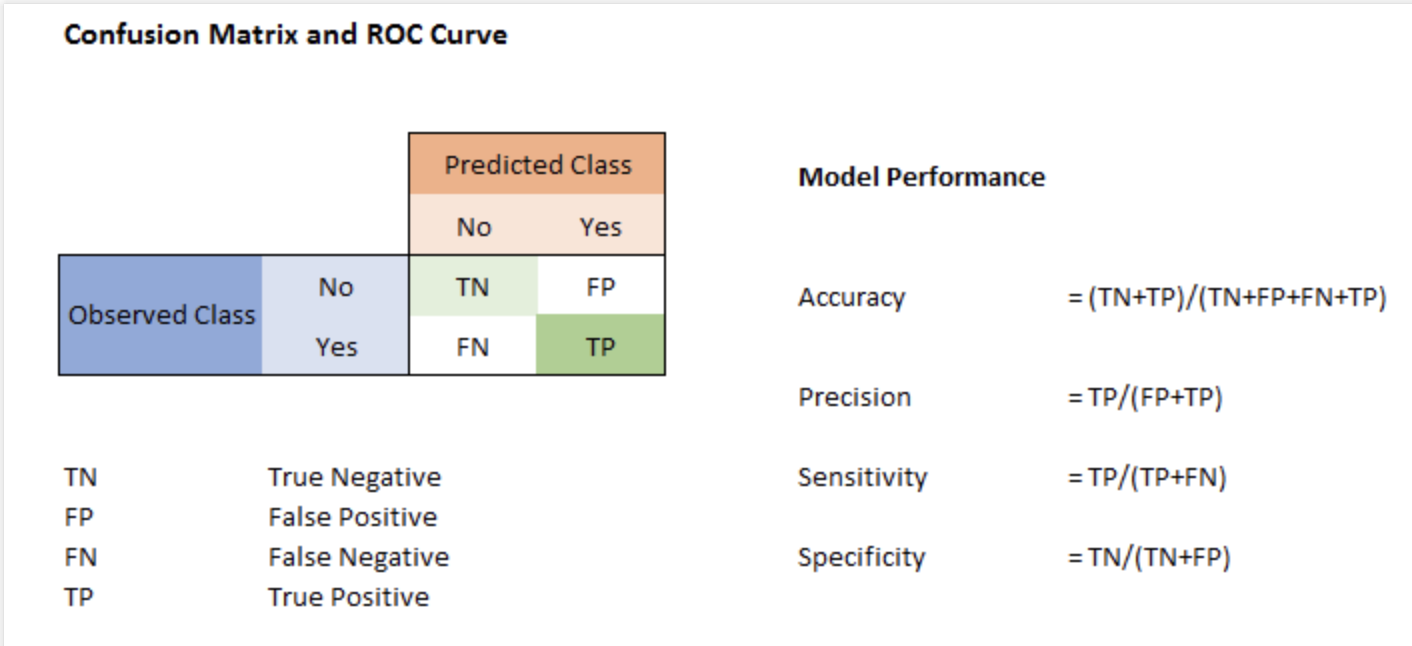

##### Task - use "tn, fp, fn, tp" to calculate "Precision,Recball,Specificity"

In [28]:
tn, fp, fn, tp = confusion_matrix(y_test, logit_reg2.predict(X_test)).ravel()

print('Precision:   {}'.format(tp/(tp+fp))) 
print('Recall:     {}'.format(tp/(tp+fn)))
print('Specificity: {}'.format( tn/(tn+fp)))

Precision:   0.6455223880597015
Recall:     0.6006944444444444
Specificity: 0.6955128205128205


##### Task - use "conf_mat" to calculate "Precision,Recball,Specificity"

In [31]:
conf_mat = confusion_matrix(y_test, logit_reg2.predict(X_test))

print('Precision', conf_mat[1,1]/(conf_mat[1,1]+conf_mat[0,1]))
print('Recall', conf_mat[1,1]/(conf_mat[1,1]+conf_mat[1,0]))
print('Specificity', conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1]))

Precision 0.6455223880597015
Recball 0.6006944444444444
Specificity 0.6955128205128205


The _scikit-learn_ function `precision_recall_fscore_support` returns
precision, recall, fbeta_score and support. 

In [32]:
precision_recall_fscore_support(y_test, logit_reg2.predict(X_test), 
                                labels=[0, 1])

(array([0.65361446, 0.64552239]),
 array([0.69551282, 0.60069444]),
 array([0.67391304, 0.62230216]),
 array([312, 288]))

In [33]:
from sklearn.metrics import classification_report

target_names = ['paid off', 'default']
print(classification_report(true_y, pred_y, target_names=target_names))

              precision    recall  f1-score   support

    paid off       0.66      0.69      0.68       312
     default       0.65      0.62      0.64       288

    accuracy                           0.66       600
   macro avg       0.66      0.66      0.66       600
weighted avg       0.66      0.66      0.66       600



## ROC Curve
The function `roc_curve` in _Scikit-learn_ calculates all the information that is required for plotting a ROC curve.

You can also try `plot_roc_curve`: https://scikit-learn.org/0.24/modules/generated/sklearn.metrics.plot_roc_curve.html

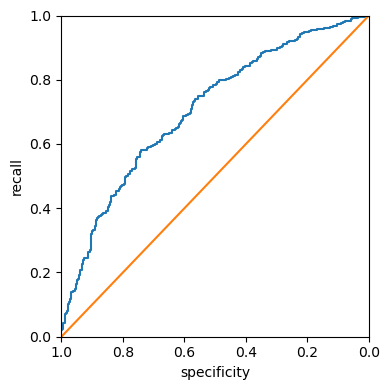

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, (logit_reg2.predict_proba(X_test)[:, 1]), 
                                 pos_label=1)
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')

plt.tight_layout()

## Accuracy and AUC
Accuracy can easily be calculated using the _scikit-learn_ function `accuracy_score`.

In [37]:
# code up accuracy metric using sklearn function
print(accuracy_score(true_y, pred_y))
print(accuracy_score(true_y, logit_reg2.predict(X_test)))

0.6583333333333333
0.65


In [36]:
print(np.sum(roc_df.recall[:-1] * np.diff(1 - roc_df.specificity)))
print(roc_auc_score(y_test, (logit_reg2.predict_proba(X_test)[:, 1])))

0.7048833689458689
0.7048833689458689


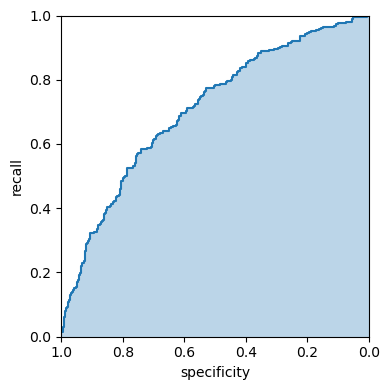

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, (logit_reg.predict_proba(X_test)[:,0]), 
                                 pos_label=1)
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
# ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)

plt.tight_layout()

## F1 Score 
### F1 = 2 * Precision* Recall/(Precision + Recall)

##### Task - Calculate F1 score for 'default'

In [40]:
Precision=tp/(tp+fp)
Recall=tp/(tp+fn)
print('F1 SCORE for Default:  {}'.format(2*Precision*Recall/(Precision+Recall)))


F1 SCORE for Default:  0.6223021582733813
